In [44]:
import os
import requests

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
cwd = os.getcwd()
cwd, _ = os.path.split(cwd)
path = os.path.join(cwd, "dataset")
os.path.isdir(path)

True

In [46]:
url = 'https://play.pokemonshowdown.com/data/pokedex.json'
params = {}
resp = requests.get(url=url, params=params)
data = resp.json() # Check the JSON Response Content documentation below

In [51]:
df = pd.DataFrame(data).T
df = df[df.num >0] # get rid of custom stuff
df = df[df.num <= 1008] # only the real pokemon

df["links"] = df.name.str.replace(" ", "-").str.lower()
df["species"] = df.baseSpecies.fillna(df.name)

clms = ["links", "species"]
df = df[clms]
df

,links,species
bulbasaur,bulbasaur,Bulbasaur
ivysaur,ivysaur,Ivysaur
venusaur,venusaur,Venusaur
venusaurmega,venusaur-mega,Venusaur
venusaurgmax,venusaur-gmax,Venusaur
...,...,...
chiyu,chi-yu,Chi-Yu
roaringmoon,roaring-moon,Roaring Moon
ironvaliant,iron-valiant,Iron Valiant
koraidon,koraidon,Koraidon


In [53]:
clms = ["pkmn", "n_images"]
X = pd.DataFrame(columns = clms)

for i, species in enumerate(df.species.unique()):
    pkmn_path = os.path.join(path, species)
    files = [img for img in os.listdir(pkmn_path) if not img.endswith(".gif")]
    data = pd.DataFrame([[species, len(files)]], index=[i], columns = clms)
    X = pd.concat([X, data])

X

,pkmn,n_images
0,Bulbasaur,31
1,Ivysaur,26
2,Venusaur,54
3,Charmander,48
4,Charmeleon,38
...,...,...
1003,Chi-Yu,5
1004,Roaring Moon,2
1005,Iron Valiant,2
1006,Koraidon,10


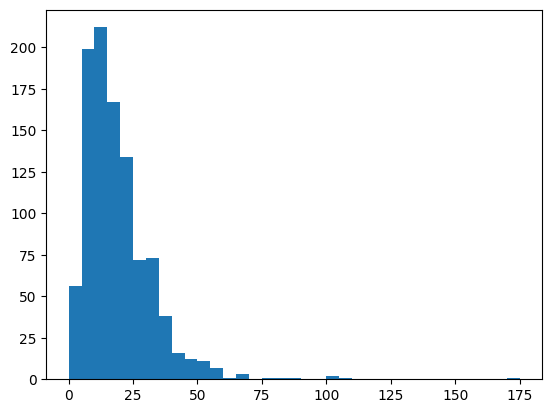

In [54]:
plt.hist(x, bins=np.arange(0, 180, 5));

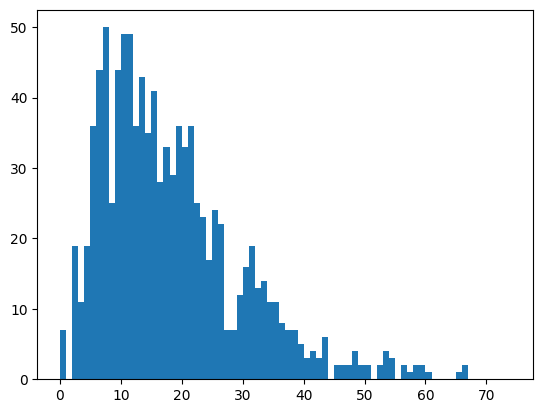

In [55]:
plt.hist(x, bins=np.arange(0, 75, 1));

In [56]:
np.mean(x < 10)

0.25297619047619047

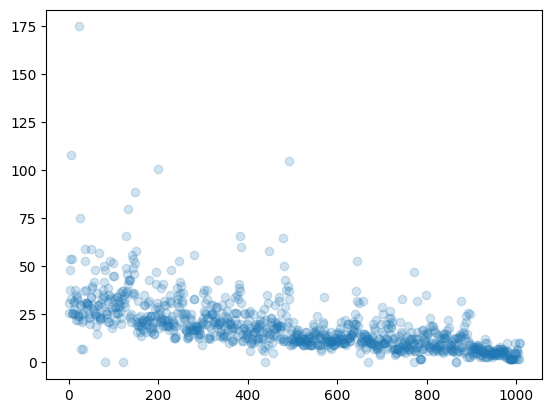

In [62]:
plt.scatter(X.index, X.n_images, alpha = 0.2);
#plt.yscale("log")